In [13]:
import numpy as np
from tensorflow.keras.models import Sequential # 모델 생성
from tensorflow.keras.layers import Dense, Input # 모델에 레이어 추가시
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from tensorflow.keras import metrics # 성능지표들

In [2]:
X_data=np.load(r'd:/ai/Downloads/Data/music/종속변수.npy')
# Y_data.shape  ==> (291,1)
Y_data=np.zeros((291,1))
Y_data[120:,:]=1
Y_data.shape

(291, 1)

In [3]:
X_data.shape

(291, 38, 1138)

In [4]:
X_data=X_data.reshape(-1,38*1138)

In [5]:
X_data.shape

(291, 43244)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

In [24]:
model = Sequential()
model.add(Input(shape=(38*1138,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                1383840   
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 32)                4128      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,398,433
Trainable params: 1,398,433
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy',metrics.Recall(), metrics.Precision()])

In [15]:
earlyStopping = EarlyStopping(patience=40)
hist = model.fit(X_train, y_train,
                 epochs=200,
                 validation_split=0.2,
                 callbacks=[earlyStopping]
                )

Epoch 1/200
6/6 [==============================] - 2s 98ms/step - loss: 0.3998 - binary_accuracy: 0.9514 - recall: 0.9369 - precision: 0.9811 - val_loss: 2.1397 - val_binary_accuracy: 0.9149 - val_recall: 0.9286 - val_precision: 0.9286
Epoch 2/200
6/6 [==============================] - 0s 20ms/step - loss: 0.2772 - binary_accuracy: 0.9622 - recall: 1.0000 - precision: 0.9407 - val_loss: 3.0445 - val_binary_accuracy: 0.9149 - val_recall: 0.9286 - val_precision: 0.9286
Epoch 3/200
6/6 [==============================] - 0s 19ms/step - loss: 0.1359 - binary_accuracy: 0.9838 - recall: 0.9730 - precision: 1.0000 - val_loss: 2.6585 - val_binary_accuracy: 0.9149 - val_recall: 0.9286 - val_precision: 0.9286
Epoch 4/200
6/6 [==============================] - 0s 23ms/step - loss: 0.0166 - binary_accuracy: 0.9946 - recall: 0.9910 - precision: 1.0000 - val_loss: 3.0765 - val_binary_accuracy: 0.8511 - val_recall: 0.9286 - val_precision: 0.8387
Epoch 5/200
6/6 [==============================] - 0s 23

6/6 [==============================] - 0s 20ms/step - loss: 1.4972e-08 - binary_accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000 - val_loss: 4.4391 - val_binary_accuracy: 0.9362 - val_recall: 0.9643 - val_precision: 0.9310
Epoch 36/200
6/6 [==============================] - 0s 20ms/step - loss: 1.4661e-08 - binary_accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000 - val_loss: 4.4372 - val_binary_accuracy: 0.9362 - val_recall: 0.9643 - val_precision: 0.9310
Epoch 37/200
6/6 [==============================] - 0s 20ms/step - loss: 1.3921e-08 - binary_accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000 - val_loss: 4.4357 - val_binary_accuracy: 0.9362 - val_recall: 0.9643 - val_precision: 0.9310
Epoch 38/200
6/6 [==============================] - 0s 23ms/step - loss: 1.3439e-08 - binary_accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000 - val_loss: 4.4342 - val_binary_accuracy: 0.9362 - val_recall: 0.9643 - val_precision: 0.9310
Epoch 39/200
6/6 [==============================]

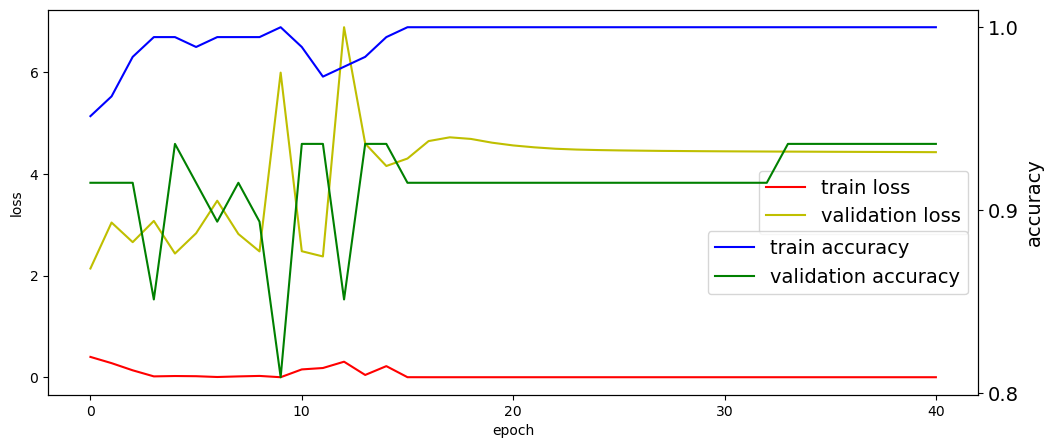

In [16]:
# 학습과정 표시하기(validation dataset 없는 경우)
fig, loss_ax = plt.subplots(figsize=(12,5))
plt.rcParams['font.size'] = 14
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['binary_accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_binary_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.45))
plt.rcParams['font.size'] = 28
plt.show()

In [28]:
model.evaluate(X_train, y_train)

8/8 [==============================] - 0s 4ms/step - loss: 0.4357 - binary_accuracy: 0.9828


[0.4356781542301178, 0.982758641242981]

In [19]:
# 모델 평가
score = model.evaluate(X_test, y_test)
print('model loss :', score[0])
print('model accuracy :', score[1])
print('model recall :', score[2])
print('model precision :', score[3])

2/2 [==============================] - 0s 6ms/step - loss: 6.0675e-05 - binary_accuracy: 1.0000 - recall_1: 1.0000 - precision_1: 1.0000
model loss : 6.0675065469695255e-05
model accuracy : 1.0
model recall : 1.0
model precision : 1.0


In [20]:
y_hat = (model.predict(X_test)>0.5).astype(int)
print(y_hat.shape)
print(confusion_matrix(y_test, y_hat))
print('f1 score :', f1_score(y_test, y_hat))

2/2 [==============================] - 0s 4ms/step
(59, 1)
[[27  0]
 [ 0 32]]
f1 score : 1.0


In [30]:
model.save('model/music_model.h5')
model_json = model.to_json()
with open('model/music_model.json','w') as f:
    f.write(model_json)

In [17]:
# 학습된 모델 로드하기
from tensorflow.keras.models import load_model
model = load_model('model/music_model.h5')

In [9]:
# 모델 사용
X_data=np.load(r'd:/ai/Downloads/Data/music/melon.npy')
print(X_data.shape[2])
X_data=X_data.reshape(-1,38*X_data.shape[2])
print(X_data.shape)

1138
(88, 43244)


In [6]:
Y=model.predict(X_data)

3/3 [==============================] - 0s 5ms/step


In [7]:
Y=(Y[:,0])

In [8]:
Y

array([1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       9.8488633e-25, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 3.1131177e-21,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 5.8594648e-16, 9.9999774e-01,
       1.0000000e+00, 9.7722000e-01, 1.0000000e+00, 1.0000000e+00,
       1.8518738e-18, 5.6232333e-02, 3.3155415e-04, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 8.1670535e-01, 6.6142940e-29,
       3.3740568e-19, 3.1681368e-04, 9.7608745e-01, 9.9999994e-01,
       1.2923721e-11, 1.4563652e-12, 1.9847516e-03, 1.2346097e-06,
       1.0000000e+00, 2.3010876e-22, 1.0000000e+00, 5.6631489e-19,
       1.0000000e+00, 8.5557329e-17, 9.9999988e-01, 1.0000000e+00,
       1.8835825e-10, 6.3963981e-09, 1.0000000e+00, 9.9745476e-01,
       2.4955759e-06, 9.9999249e-01, 4.1685127e-02, 2.8760189e-07,
       9.3859100e-01, 0.0000000e+00, 5.1541500e-09, 2.8767522e

In [9]:
filepath=r'd:/ai/Downloads/Data/music/Melon Daily Top 100 _ 멜론 일간차트/'
filelist=os.listdir(filepath)

In [10]:
filelist

['(G)I-DLE - Fate (나는 아픈 건 딱 질색이니까).wav',
 '(G)I-DLE - Klaxon (클락션 (Klaxon)).wav',
 'aespa - Drama.wav',
 'aespa - UP (KARINA Solo).wav',
 'AKMU - 어떻게 이별까지 사랑하겠어, 널 사랑하는 거지 (How can I love the heartbreak, you`re the one I love).wav',
 'BABYMONSTER - DRIP.wav',
 'BIGBANG - 봄여름가을겨울 (Still Life).wav',
 'BOYNEXTDOOR - 오늘만 I LOVE YOU.wav',
 'BSS (SEVENTEEN) - 청바지.wav',
 'BTS (방탄소년단) - Dynamite.wav',
 'BTS (방탄소년단) - 봄날.wav',
 'Crush - 미안해 미워해 사랑해.wav',
 'DAY6 - Congratulations.wav',
 'DAY6 - HAPPY.wav',
 'DAY6 - Welcome to the Show.wav',
 'DAY6 - 녹아내려요 Melt Down.wav',
 'DAY6 - 예뻤어 You Were Beautiful.wav',
 'DAY6 - 한 페이지가 될 수 있게 Time of Our Life.wav',
 'ECLIPSE - Sudden Shower.wav',
 'EXO - 첫 눈 The First Snow.wav',
 'fromis_9 - Supersonic.wav',
 'G-DRAGON - 무제 (無題) (Untitled, 2014).wav',
 'GFRIEND - 우리의 다정한 계절 속에 (Season of Memories).wav',
 'GyeongseoYeji, Jeon Gunho - If you lovingly call my name (다정히 내 이름을 부르면).wav',
 'Hwang Karam, woozoobe, lunch, lunch - I`m Firefly (나는 반딧불).wav',
 'ILLIT

In [15]:
answer=[filename for filename, y in zip(filelist,Y) if y >= 0.7]

In [16]:
answer

['(G)I-DLE - Fate (나는 아픈 건 딱 질색이니까).wav',
 '(G)I-DLE - Klaxon (클락션 (Klaxon)).wav',
 'aespa - Drama.wav',
 'aespa - UP (KARINA Solo).wav',
 'BABYMONSTER - DRIP.wav',
 'BIGBANG - 봄여름가을겨울 (Still Life).wav',
 'BOYNEXTDOOR - 오늘만 I LOVE YOU.wav',
 'BSS (SEVENTEEN) - 청바지.wav',
 'BTS (방탄소년단) - Dynamite.wav',
 'BTS (방탄소년단) - 봄날.wav',
 'DAY6 - Congratulations.wav',
 'DAY6 - HAPPY.wav',
 'DAY6 - Welcome to the Show.wav',
 'DAY6 - 녹아내려요 Melt Down.wav',
 'DAY6 - 예뻤어 You Were Beautiful.wav',
 'DAY6 - 한 페이지가 될 수 있게 Time of Our Life.wav',
 'EXO - 첫 눈 The First Snow.wav',
 'fromis_9 - Supersonic.wav',
 'G-DRAGON - 무제 (無題) (Untitled, 2014).wav',
 'GFRIEND - 우리의 다정한 계절 속에 (Season of Memories).wav',
 'GyeongseoYeji, Jeon Gunho - If you lovingly call my name (다정히 내 이름을 부르면).wav',
 'IU, Donghwan Seo, Donghwan Seo, IU - Love wins all (Love wins all).wav',
 'IVE - Queen of Hearts.wav',
 'JAESSBEE, Hwang Hyun (MonoTree), Hwang Hyun (MonoTree), JeA (MonoTree), Kim Eana, J SQUARE - Every Moment With You (너와의 모든 

In [21]:
len(answer),len(filelist)

(53, 88)